# House Price Prediction Project

For this project, I analyzed a [Kaggle dataset](https://www.kaggle.com/harlfoxem/housesalesprediction) about housing prices and features in a Seattle county and created a linear regression model to predict housing prices.

**Imported the libraries for data exploration and visualization:**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

**This is what the dataset contains:**

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
type(df['date'][0])

str

**Change the variable type of the date column from a string object to datetime object:**

In [7]:
df['date'] = pd.to_datetime(df.date)

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

I think most of the columns are self-explanatory but just for clarification:
    
id - Unique ID for each home sold 

date - Date of the home sale 

price - Price of each home sold 

bedrooms - Number of bedrooms 

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower 

sqft_living - Square footage of the apartments interior living space 

sqft_lot - Square footage of the land space 

floors - Number of floors 

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 

view - An index from 0 to 4 of how good the view of the property was 

condition - An index from 1 to 5 on the condition of the apartment, 

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

sqft_above - The square footage of the interior housing space that is above ground level 

sqft_basement - The square footage of the interior housing space that is below ground level 

yr_built - The year the house was initially built 

yr_renovated - The year of the house’s last renovation 

zipcode - What zipcode area the house is in 

lat - Lattitude 

long - Longitude 

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors 

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors 

In [10]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

**I analyse the variable (the price column) that we want to predict the values of:**

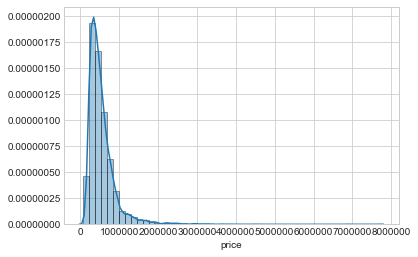

In [11]:
sns.distplot(df['price'])

**House prices deviates from a normal distribution. Seems to show a positive skewness which is expected of housing prices.**

In [12]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())
print("Mean: %f" % df['price'].mean())
print("Median: %f" % df['price'].median())

Skewness: 4.024069
Kurtosis: 34.585540
Mean: 540088.141767
Median: 450000.000000


**Calculations confirm that the price distribution indeed has positive skewness and excess kurtosis and we would need to standardize our data later to fix this.**

**Comparing the price distribution with other variables:**

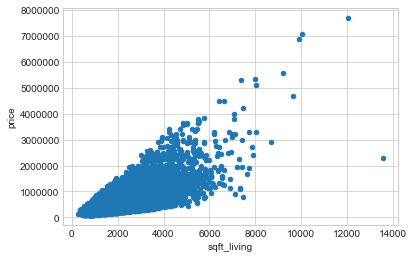

In [13]:
df.plot.scatter(x='sqft_living', y='price')

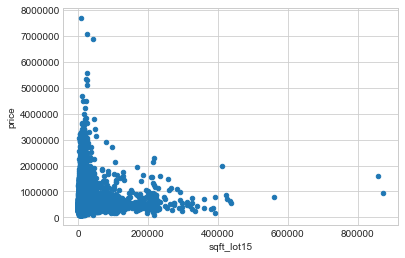

In [14]:
df.plot.scatter(x='sqft_lot15', y='price')

**I can see a positive linear relationship with sqft_living data and prices but not with sqft_lot15 data and prices.**

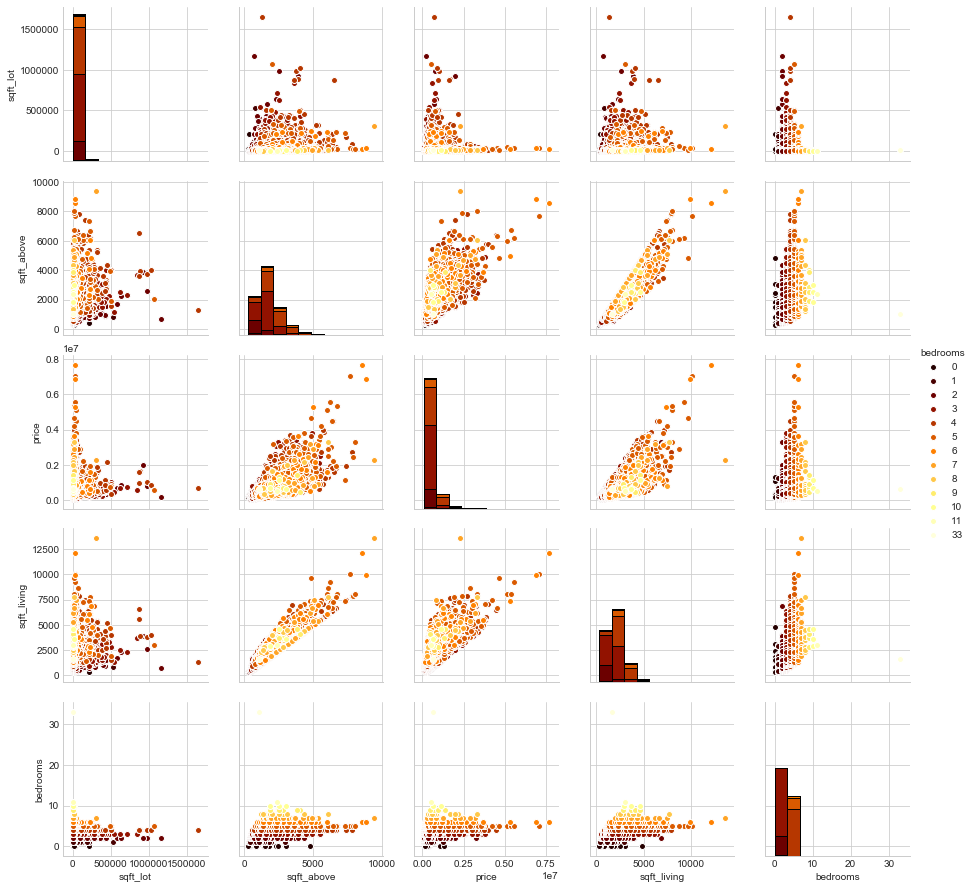

In [15]:
sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot')

**I did a pairplot with all the numerical variables of the dataset. Prices has linear relationships with sqft_living and sqft_above. I also further sorted the data by the bedrooms column just out of curiosity. There seems to be nothing out of order except for an outlier where the house apparently has 33 bedrooms! Possibly an typo and not really an outlier.**

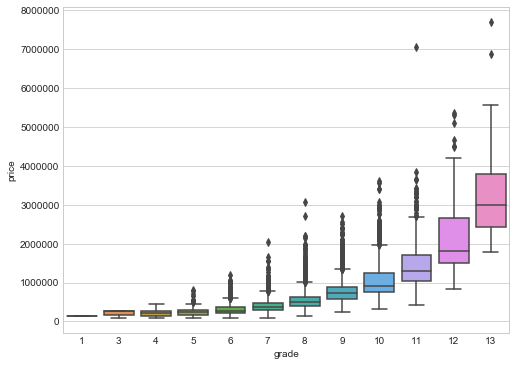

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y='price', data=df)

**Grade refers to the quality of construction. The higher the grade the higher the price.**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

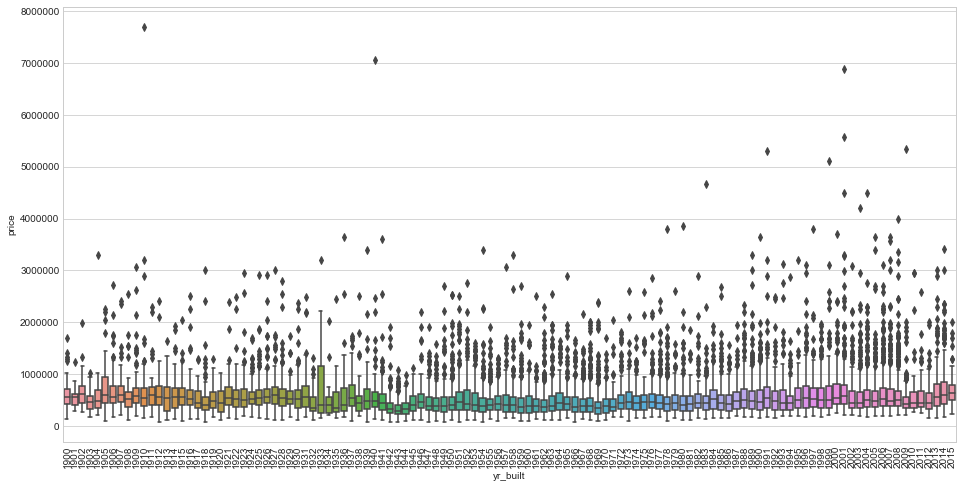

In [17]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='yr_built', y='price', data=df)
plt.xticks(rotation=90)

**Not much of a relationship between the price and the year it was built however.**

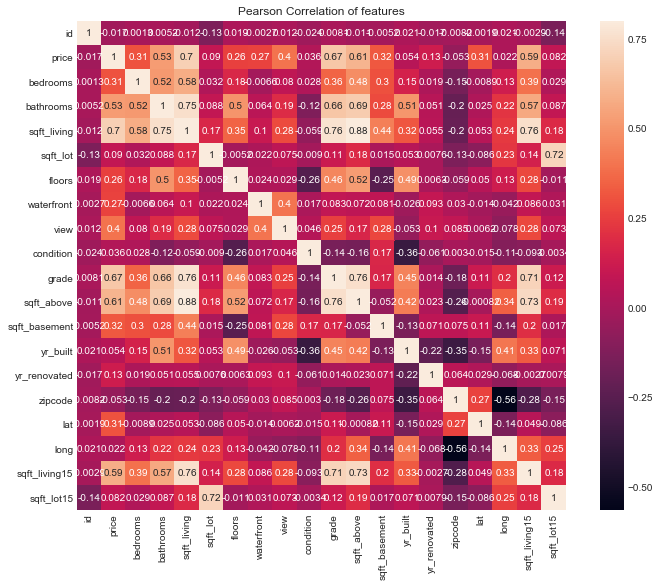

In [18]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True)
plt.title('Pearson Correlation of features')

**There is significant correlation between the grade and sqft_above and sqft_basement variables as well as correlation between the bathroom and sqft_living variables that could result in multicollinearity.**

Multicollinearity is when you have independent variables (i.e. sqft variables) that are not only correlated to your response variable (i.e prices) but also highly correlated to each other. I don't want that to happen as too many correlated features will make it difficult for me to determine the effect of independent variables on my response variable.

**In the cluster maps below, I can definitely see a moderately high correlation between price, sqft_above, sqft_living15, sqft_living, grade as well as bathrooms:**

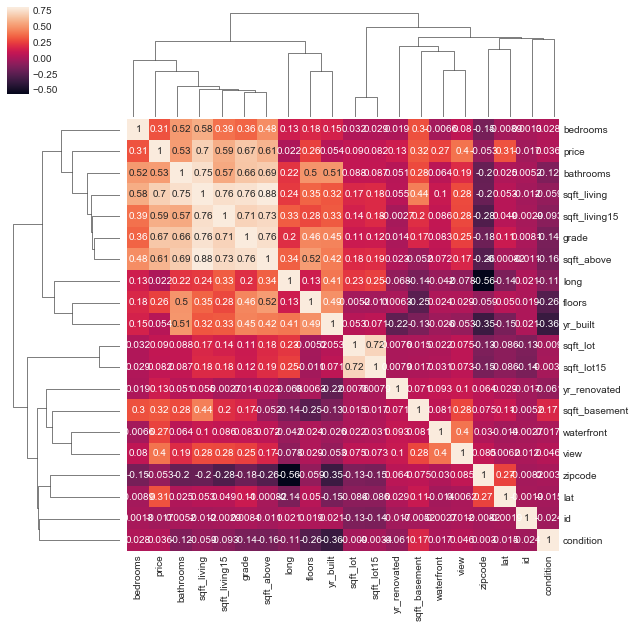

In [19]:

sns.clustermap(corrmat, vmax=.8, square=True, annot = True)

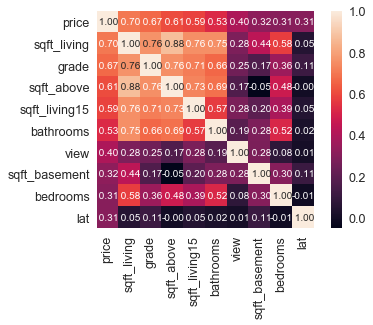

In [25]:
k = 10
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**I think I've analysed the variables enough. I'll need to standardize the data later for my linear model.**

**Now I'll check to see if there is any missing data in this dataset:**

In [22]:
df.isnull().sum

<bound method DataFrame.sum of           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
5      False  False  False     False      False        False     False   
6      False  False  False     False      False        False     False   
7      False  False  False     False      False        False     False   
8      False  False  False     False      False        False     False   
9      False  False  False     False      False        False     False   
10     False  False  False     False      False        False     False   
11     False  False  False     False      False        False     False   
12     

**Surprisingly, there is none!**

**Now to transform our data!**

In [23]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

**Analysing the price data for outliers. Here, I'll standardize the data and convert values to have a mean of 0 and a standard deviation of 1:**

In [29]:
price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[ 10.75649871]
 [ 10.78646177]
 [ 11.24407943]
 [ 12.45022882]
 [ 12.96559346]
 [ 13.10178919]
 [ 13.70105041]
 [ 17.28299812]
 [ 17.76649297]
 [ 19.50298853]]


**Our lower outer range looks fine and doesn't stray too far from 0 which is the normal distribution. The high outer range though, yikes. Based from our earlier analysis, we already know that the price data is skewed with excess kurtosis, hence why the high range values are far from 0 and way out of range. **

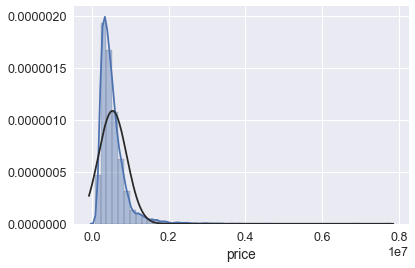

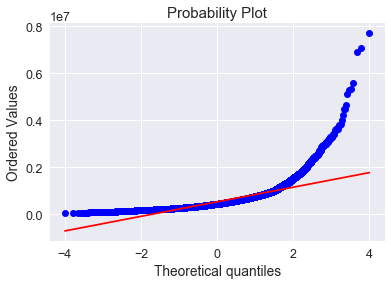

In [35]:
sns.distplot(df['price'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['price'], plot = plt)

**See how the price data does not follow the linear line? I will need to fix that.**

In [36]:
#I can do a log transformation on our price data to make the data less skewed.
df['price'] = np.log(df['price'])

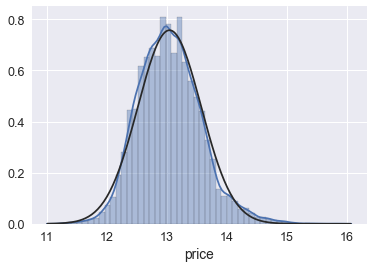

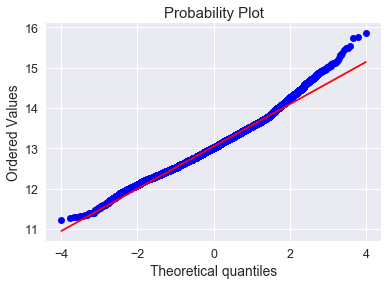

In [37]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
results = stats.probplot(df['price'], plot=plt)

**Much better. Now I also do the same with sqft_living. This also helps to reduce the effect of multicollinearity.**

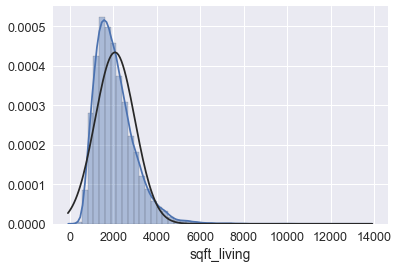

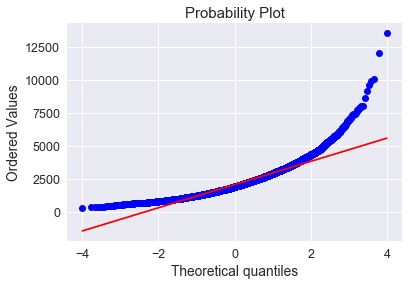

In [38]:
sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_living'], plot = plt)

In [39]:
df['sqft_living'] = np.log(df['sqft_living'])

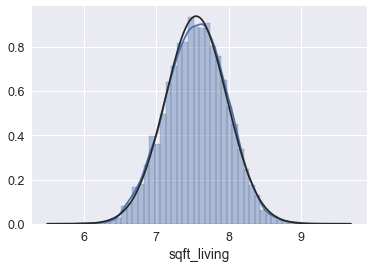

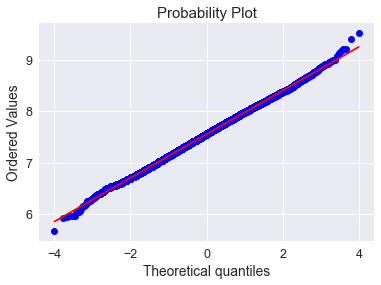

In [40]:
sns.distplot(df['sqft_living'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_living'], plot = plt)

** ... and with sqft_above **

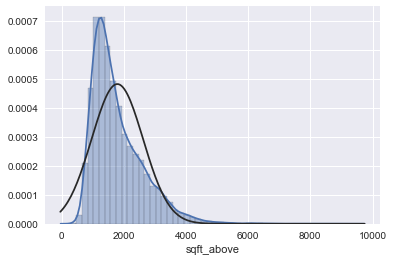

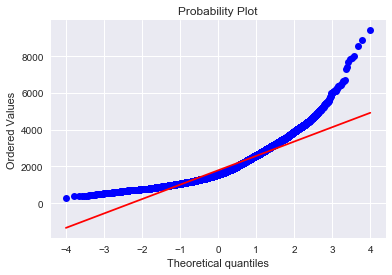

In [42]:
sns.distplot(df['sqft_above'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_above'], plot = plt)

In [43]:
df['sqft_above'] = np.log(df['sqft_above'])

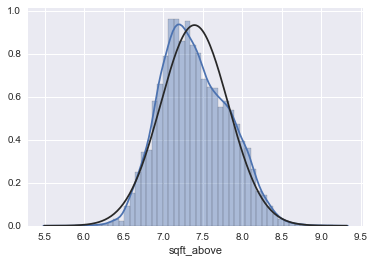

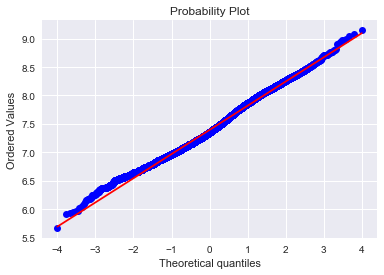

In [44]:
sns.distplot(df['sqft_above'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_above'], plot = plt)

** as well as with sqft_living15 **

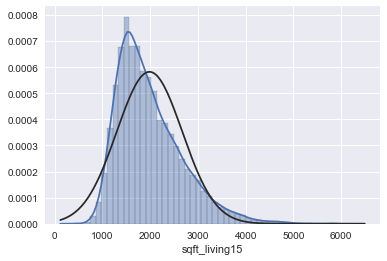

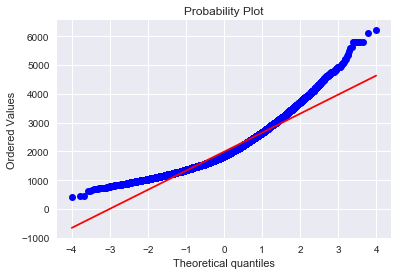

In [45]:
sns.distplot(df['sqft_living15'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_living15'], plot = plt)

In [46]:
df['sqft_living15'] = np.log(df['sqft_living15'])

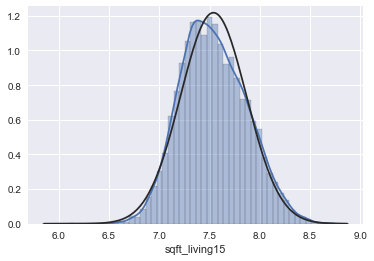

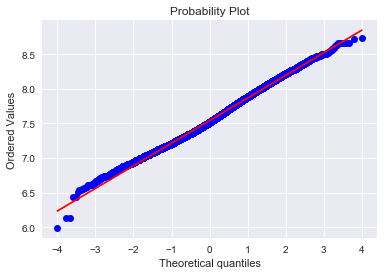

In [47]:
sns.distplot(df['sqft_living15'], fit=norm)
fig = plt.figure()
results = stats.probplot(df['sqft_living15'], plot = plt)

In [52]:
#Convert the categorical variables into dummy variables
df= pd.get_dummies(df)

**Let's see if we can build a simple linear regression model.**

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Splitting my data into two separate arrays. X contains the features to train on and Y contains the responding variable:**

In [55]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y = df['price']

**Splitting the data into a training set and test set. The training set will be used train the model on and the test set will be used to evaluate the model.**

In [1]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

**I create and train the model:**

In [58]:
from sklearn.linear_model import  LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Predictions from the model I created:**

In [66]:
predictions = lm.predict(X_test)

In [67]:
predictions

array([ 13.1463601 ,  13.31834546,  13.00270029, ...,  14.27280664,
        12.66028581,  12.71136845])

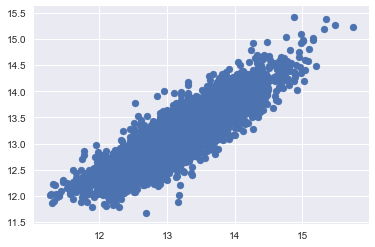

In [68]:
plt.scatter(y_test, predictions)

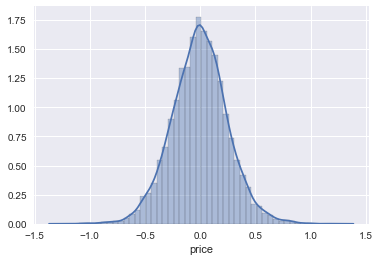

In [69]:
sns.distplot((y_test - predictions))

In [74]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())
print("Mean: %f" % df['price'].mean())
print("Median: %f" % df['price'].median())

Skewness: 0.428072
Kurtosis: 0.691854
Mean: 13.047817
Median: 13.017003


**My model doesn't show a perfect linear fit and there is some noise so it probably can't predict prices with a 100% but it still shows a moderately good linear relationship between our actual prices and the predictions made.**

**Evaluating the performance of my model:**

In [70]:
from sklearn import metrics

In [73]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

0.25328068838473639

In [77]:
accuracy = lm.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 77%'

**My model scored an accuracy rating of 77% with a root mean square error of 0.25 which is not too bad for my first ever regression model.**

**I found variables positively correlating with my prices variable but also found that some of the variables were also highly correlated with one another which I tried to reduce by standardizing my data. The prices data contained a high amount outliers in the high outer range of values which could have affected the accuracy of my model as well.**

**Moving forwards from this project, I could perhaps use a gradient boosting model to boost the accuracy of my model and reduce the value of my RMSE.**